Q1.
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


-For each element C[i, j], we need to perform k multiplications (one for each corresponding element in the row of A and column of B) and sum them up.

-So, for a single element C[i, j], k multiplications.

-Since there are n x m elements in the resulting matrix C, the total number of multiplications is n x m x k.

Number of Additions:

-For each element C[i, j], you need to perform (k - 1) additions after the k multiplications.

-Therefore, for a single element C[i, j], you need (k - 1) additions.

-Since there are n x m elements in the resulting matrix C, the total number of additions is (n x m) x (k - 1).


Q2.
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. 
Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
from time import time
import numpy as np

def matmul(A, B):
    N = len(A)
    product = [[0 for x in range(N)] for y in range(N)]
    for i in range(N):
        for j in range(N):
            for k in range(N):
                product[i][j] += A[i][k] * B[k][j]
    return product

matrix1 = np.random.rand(1000, 1000)
matrix2 = np.random.rand(1000, 1000)

t = time()
prod = matmul(matrix1, matrix2)
print("Normal", time() - t)

t = time()
np_prod = np.matmul(matrix1, matrix2)
print("Numpy", time() - t)


Numpy array has faster runtime. 
The reason being that how numpy treats its arrays vs how python treats its lists. Lists can have different data types and numpy arrays only has the same data type (homogeneous datatype) so that time is saved in evaluating the data type. Also numpy carries out multiply operations parallely hence making it very fast in multiplying matrices.

Q3.) 
a) Time complexity for one pass of the array is n. n being the number of elements in the array. Also, the median is the (n+1)/2 th largest element in the array (For odd n) and average of n/2 th and n/2+1 th element.

Hence it will have a total of n*(n+1)/2= O(n^2) time complexity.

b) A better method would be to sort the elements of the array in the increasing order in O(nlogn) complexity and then easily find the median by the index.

In [30]:
import numpy as np
import time

arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array
high=np.array([0,0,0,0,0]) #5 elements for 5 passes (5th highest number is median)

start=time.time()

for i in range(5):
    if i==0:
        for j in arr:
            if j>high[i]:
                high[i]=j
    else:
        for j in arr:
            if high[i-1]>j>high[i]:
                high[i]=j
                
print(high[4])

print('\n')

print(f'Time: {time.time() - start}')


5


Time: 0.00014519691467285156


In [31]:
import numpy as np
import time
arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array

start=time.time()

np.sort(arr)
print(arr[4])

print('\n')

print(f'Time: {time.time() - start}')

5


Time: 0.0003528594970703125


In [32]:
import numpy as np
import time
arr=np.array([7,6,9,8,5,2,1,4,3]) #9 element array

start=time.time() 

print(np.median(arr))

print('\n')

print(f'Time: {time.time() - start}')

5.0


Time: 0.0004680156707763672


Usually numpy.median is faster than other two methods. But in above example maybe due less size of array the result seems altered. For larger arrays it becomes true.

Q4.
What is the gradient of the following function with respect to x and y?


$f(x, y) = x^2y + y^3\sin(x)$

Partial derivative with respect to x:
$\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)$

Partial derivative with respect to y:
$\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)$

Gradient vector:
$\nabla f = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = \left( 2xy + y^3\cos(x), x^2 + 3y^2\sin(x) \right)$



Q5.
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few 
random values of x and y

In [40]:
import jax
import jax.numpy as jnp

def f(x,y):
    return x**2*y + y**3* jnp.sin(x)

def gradAnalytical (x, y):
    dx = 2 * x * y + y**3 * jnp.cos(x)
    dy = x**2 + 3 * y**2 * jnp.sin(x)
    return jnp.array([dx, dy])

gradJax= jax.grad(f, (0, 1))

rng = jax.random.PRNGKey(0)
x_values = jax.random.uniform(rng, (5,))
y_values = jax.random.uniform(rng, (5,))


for x, y in zip(x_values, y_values):
    gradAnalyticalRes = gradAnalytical(x, y)
    gradJaxRes = gradJax(x, y)
    gradJaxRes = jnp.array(gradJaxRes)

    print(f"For x={x}, y={y}:")
    print("Analytical Gradient:", gradAnalyticalRes)
    print("JAX Gradient:", gradJaxRes)
    print("Are the gradients close?", jnp.allclose(gradAnalyticalRes, gradJaxRes))
    print("\n")

For x=0.5745004415512085, y=0.5745004415512085:
Analytical Gradient: [0.8192759 0.8681149]
JAX Gradient: [0.8192759 0.8681149]
Are the gradients close? True


For x=0.09968602657318115, y=0.09968602657318115:
Analytical Gradient: [0.0208603  0.01290422]
JAX Gradient: [0.0208603  0.01290422]
Are the gradients close? True


For x=0.39316022396087646, y=0.39316022396087646:
Analytical Gradient: [0.36528587 0.33223233]
JAX Gradient: [0.36528587 0.33223233]
Are the gradients close? True


For x=0.8941782712936401, y=0.8941782712936401:
Analytical Gradient: [2.046779  2.6697807]
JAX Gradient: [2.046779  2.6697807]
Are the gradients close? True


For x=0.5965665578842163, y=0.5965665578842163:
Analytical Gradient: [0.8874234 0.9557172]
JAX Gradient: [0.8874234 0.9557172]
Are the gradients close? True




Q6.
Use sympy to confirm that you obtain the same gradient analytically.

In [41]:
from sympy.vector import CoordSys3D, gradient
import sympy
R = CoordSys3D('R')
s1 = (R.x**2)*R.y + (R.y**3)*sympy.sin(R.x)
print(gradient(s1))

(2*R.x*R.y + R.y**3*cos(R.x))*R.i + (R.x**2 + 3*R.y**2*sin(R.x))*R.j


Q7.
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and 
their marks.

In [42]:
years={
2022 : {
    'CSE': {'1':{'Name':'Disha','Roll Number': 21110001, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2': {'Name':'Yashika','Roll Number': 21110004, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}},
    'EE': {'1': {'Name':'Saumya','Roll Number': 21110001, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2':{'Name':'Shubhangi','Roll Number': 21110004, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}}
},
2021 : {
    'CSE': {'1':{'Name':'Amisha','Roll Number': 21110007, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2': {'Name':'Kanishka','Roll Number': 21110026, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}},
    'EE': {'1': {'Name':'Aalia','Roll Number': 21110037, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}},
               '2':{'Name':'Aarti','Roll Number': 21110236, 'Marks:' : {'Maths': 100, 'English' : 90, 'Science': 90}}}
}
}
print(years)

{2022: {'CSE': {'1': {'Name': 'Disha', 'Roll Number': 21110001, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Yashika', 'Roll Number': 21110004, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}, 'EE': {'1': {'Name': 'Saumya', 'Roll Number': 21110001, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Shubhangi', 'Roll Number': 21110004, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}}, 2021: {'CSE': {'1': {'Name': 'Amisha', 'Roll Number': 21110007, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Kanishka', 'Roll Number': 21110026, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}, 'EE': {'1': {'Name': 'Aalia', 'Roll Number': 21110037, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}, '2': {'Name': 'Aarti', 'Roll Number': 21110236, 'Marks:': {'Maths': 100, 'English': 90, 'Science': 90}}}}}


Q8.
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [43]:
class Student:
    def __init__(self,Name,RollNumber,Maths,English,Science):
        self.Name= Name
        self.RollNumber = RollNumber
        self.Marks=self.Marks(Maths,English,Science)
    def display(self):
        print(f"Name: {self.Name}, Roll Number: {self.RollNumber}, Marks:")
        self.Marks.display()
    class Marks:
        def __init__(self,Maths,English,Science):
            self.Maths=Maths
            self.English=English
            self.Science=Science
            
        def display(self):
            print(f"Maths: {self.Maths}, English: {self.English}, Science: {self.Science}")
        
S1=Student("Disha",21110001,100,90,90)
S2=Student("Yashika",21110002,100,90,90)
S3=Student("Saumya",21110003,100,90,90)
S4=Student("Shubhangi",21110004,100,90,90)
S5=Student("Amisha",21110005,100,90,90)
S6=Student("Kanishka",2111006,100,90,90)
S7=Student("Aalia",21110007,100,90,90)
S8=Student("Aarti",21110008,100,90,90)
S9=Student("Amrita",21110010,100,90,90)
S10=Student("Sakshi",21110011,100,90,90)
S11=Student("Aditi",21110012,100,90,90)
S12=Student("Simran",21110013,100,90,90)
CSE2022=[S1,S2]
EE2022=[S3,S4]
ME2022=[S5,S6]
Y2022=[CSE2022,EE2022,ME2022]
CSE2021=[S7,S8]
EE2021=[S9,S10]
ME2021=[S11,S12]
Y2021=[CSE2021,EE2021,ME2021]
for i in Y2022:
    for j in range(2):
        i[j].display()
        print('\n')
    print('\n\n')
print('-------------------------------\n\n\n\n\n')
for i in Y2021:
    for j in range(2):
        i[j].display()
        print('\n')
    print('\n\n')

Name: Disha, Roll Number: 21110001, Marks:
Maths: 100, English: 90, Science: 90


Name: Yashika, Roll Number: 21110002, Marks:
Maths: 100, English: 90, Science: 90





Name: Saumya, Roll Number: 21110003, Marks:
Maths: 100, English: 90, Science: 90


Name: Shubhangi, Roll Number: 21110004, Marks:
Maths: 100, English: 90, Science: 90





Name: Amisha, Roll Number: 21110005, Marks:
Maths: 100, English: 90, Science: 90


Name: Kanishka, Roll Number: 2111006, Marks:
Maths: 100, English: 90, Science: 90





-------------------------------





Name: Aalia, Roll Number: 21110007, Marks:
Maths: 100, English: 90, Science: 90


Name: Aarti, Roll Number: 21110008, Marks:
Maths: 100, English: 90, Science: 90





Name: Amrita, Roll Number: 21110010, Marks:
Maths: 100, English: 90, Science: 90


Name: Sakshi, Roll Number: 21110011, Marks:
Maths: 100, English: 90, Science: 90





Name: Aditi, Roll Number: 21110012, Marks:
Maths: 100, English: 90, Science: 90


Name: Simran, Roll Number: 2111001

Q9.
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

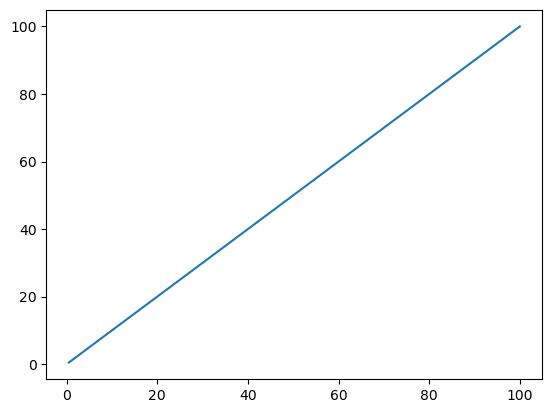

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=x
plt.plot(x,y)
plt.show()

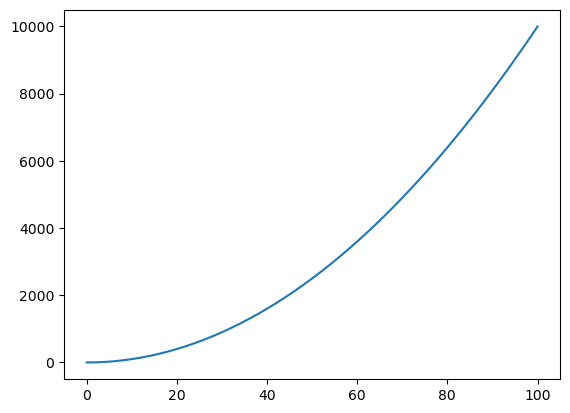

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,100,200)
y=x**2
plt.plot(x,y)
plt.show()

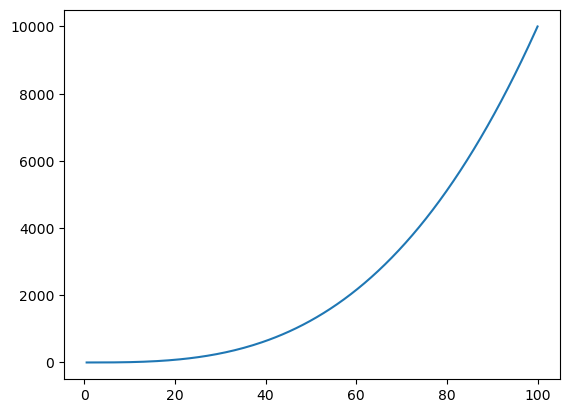

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=(x**3)/100
plt.plot(x,y)
plt.show()

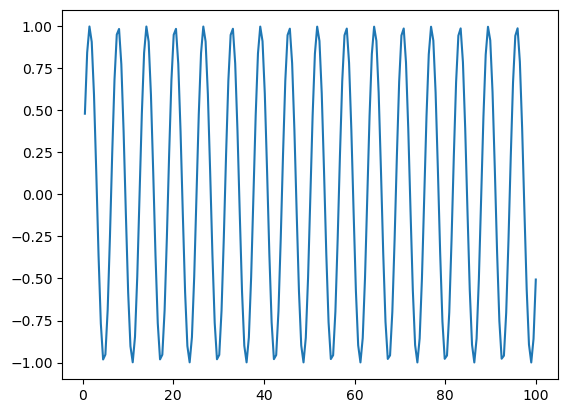

In [47]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.sin(x)
plt.plot(x,y)
plt.show()

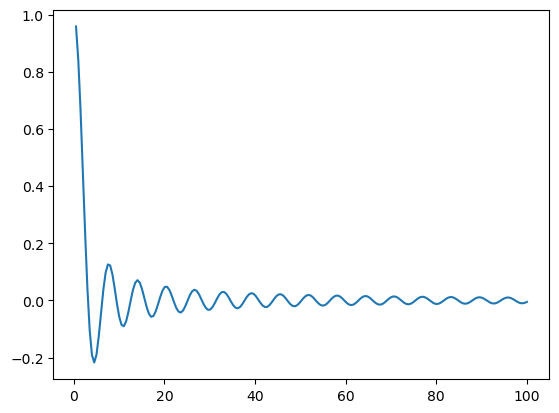

In [48]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.sin(x)/x
plt.plot(x,y)
plt.show()

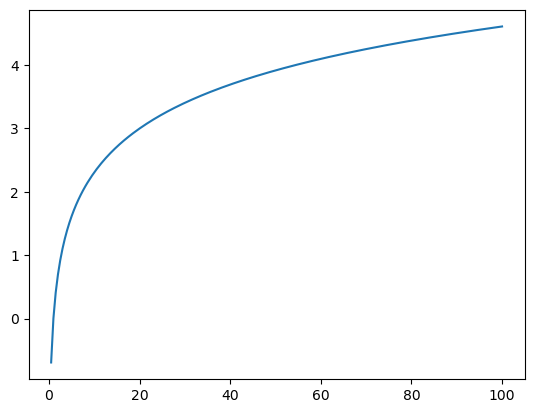

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.log(x)
plt.plot(x,y)
plt.show()

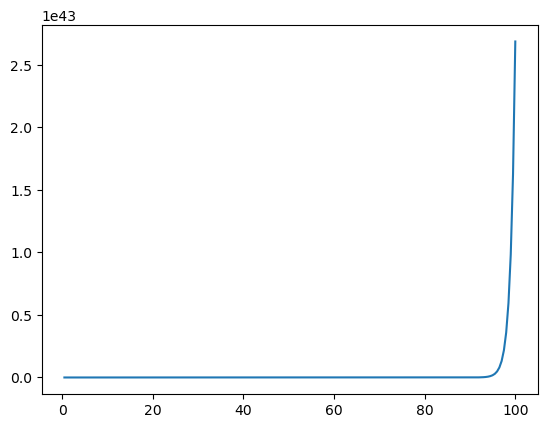

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0.5,100,199)
y=np.exp(x)
plt.plot(x,y)
plt.show()

In [51]:
import numpy as np
import pandas as pd
import random
arr=np.empty((20,5))
for i in arr:
    for j in range(len(i)):
        i[j]=1+random.random()
print(arr)
df=pd.DataFrame(arr,columns = ['a','b','c','d','e'])
print(df)

print(df.std(ddof=0))
print(df.mean(axis=1))

[[1.5414695  1.63026745 1.3564615  1.01141394 1.17755613]
 [1.63629664 1.55866927 1.98541506 1.11737888 1.25279934]
 [1.19241233 1.65706573 1.93638381 1.21547884 1.45198842]
 [1.51324238 1.5647565  1.08774843 1.14815964 1.54942695]
 [1.41077838 1.11181011 1.83039274 1.79519384 1.8648516 ]
 [1.62088856 1.34789319 1.51769143 1.63213863 1.28126511]
 [1.14270629 1.9530609  1.45634407 1.81542881 1.27997939]
 [1.66189375 1.05322573 1.07612192 1.64428685 1.15829842]
 [1.42317851 1.93076216 1.90026896 1.37647647 1.47131442]
 [1.13815692 1.4638454  1.96424262 1.18781699 1.89408686]
 [1.04319343 1.24277712 1.87916183 1.09444286 1.65192013]
 [1.23323627 1.09556385 1.14795847 1.66472451 1.84273471]
 [1.68326232 1.38068306 1.44797108 1.39611404 1.94645365]
 [1.76345066 1.61295936 1.7618517  1.98513134 1.91267999]
 [1.98323013 1.52468698 1.1266845  1.61807889 1.7787821 ]
 [1.4179262  1.00375598 1.51269559 1.46117874 1.52912998]
 [1.56214418 1.64997331 1.09331418 1.1888299  1.10810453]
 [1.2390461  1

In [56]:
import numpy as np
import pandas as pd
arr=np.array(
 [[1.5414695,  1.63026745, 1.3564615,  1.01141394, 1.17755613],
 [1.63629664, 1.55866927, 1.98541506, 1.11737888, 1.25279934],
 [1.19241233, 1.65706573, 1.93638381, 1.21547884, 1.45198842],
 [1.51324238, 1.5647565,  1.08774843, 1.14815964, 1.54942695],
 [1.41077838, 1.11181011, 1.83039274, 1.79519384, 1.8648516 ],
 [1.62088856, 1.34789319, 1.51769143, 1.63213863, 1.28126511],
 [1.14270629, 1.9530609,  1.45634407, 1.81542881, 1.27997939],
 [1.66189375, 1.05322573, 1.07612192, 1.64428685, 1.15829842],
 [1.42317851, 1.93076216, 1.90026896, 1.37647647, 1.47131442],
 [1.13815692, 1.4638454,  1.96424262, 1.18781699, 1.89408686],
 [1.04319343, 1.24277712, 1.87916183, 1.09444286, 1.65192013],
 [1.23323627, 1.09556385, 1.14795847, 1.66472451, 1.84273471],
 [1.68326232, 1.38068306, 1.44797108, 1.39611404, 1.94645365],
 [1.76345066, 1.61295936, 1.7618517,  1.98513134, 1.91267999],
 [1.98323013, 1.52468698, 1.1266845,  1.61807889, 1.7787821 ],
 [1.4179262,  1.00375598, 1.51269559, 1.46117874, 1.52912998],
 [1.56214418, 1.64997331, 1.09331418, 1.1888299,  1.10810453],
 [1.2390461,  1.82106831, 1.53275935, 1.18782875, 1.92798973],
 [1.03505213, 1.79630682, 1.82509128, 1.50792444, 1.42157069],
 [1.10398122, 1.0280067,  1.0785792,  1.87757769, 1.97767392]]) #from previous question
df=pd.DataFrame(arr,columns = ['a','b','c','d','e'])
df = df.assign(f=df['a'] + df['b'] + df['c'] + df['d'] + df['e'])
df=df.assign(g = df['f'].apply(lambda x: "LT8" if x < 8 else "GT8"))
print(df)
print(f"LT8: {df.loc[df['g'] == 'LT8', 'f'].std()}")
print(f"GT8: {df.loc[df['g'] == 'GT8', 'f'].std()}")

           a         b         c         d         e         f    g
0   1.541470  1.630267  1.356461  1.011414  1.177556  6.717169  LT8
1   1.636297  1.558669  1.985415  1.117379  1.252799  7.550559  LT8
2   1.192412  1.657066  1.936384  1.215479  1.451988  7.453329  LT8
3   1.513242  1.564757  1.087748  1.148160  1.549427  6.863334  LT8
4   1.410778  1.111810  1.830393  1.795194  1.864852  8.013027  GT8
5   1.620889  1.347893  1.517691  1.632139  1.281265  7.399877  LT8
6   1.142706  1.953061  1.456344  1.815429  1.279979  7.647519  LT8
7   1.661894  1.053226  1.076122  1.644287  1.158298  6.593827  LT8
8   1.423179  1.930762  1.900269  1.376476  1.471314  8.102001  GT8
9   1.138157  1.463845  1.964243  1.187817  1.894087  7.648149  LT8
10  1.043193  1.242777  1.879162  1.094443  1.651920  6.911495  LT8
11  1.233236  1.095564  1.147958  1.664725  1.842735  6.984218  LT8
12  1.683262  1.380683  1.447971  1.396114  1.946454  7.854484  LT8
13  1.763451  1.612959  1.761852  1.985131  1.91

Q12.
Write a small piece of code to explain broadcasting in numpy.


Broadcasting is a powerful feature in NumPy that allows operations on arrays of different shapes and sizes without explicitly reshaping them. Here's a small piece of code to explain broadcasting in NumPy:

In [57]:
import numpy as np

# Create a 2D array (3x3)
array_2d = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])

# Create a 1D array (3 elements)
array_1d = np.array([10, 20, 30])

# Perform broadcasting by adding the 1D array to each row of the 2D array
result = array_2d + array_1d

# Print the original arrays and the result
print("2D Array:")
print(array_2d)
print("\n1D Array:")
print(array_1d)
print("\nResult after broadcasting:")
print(result)


2D Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

1D Array:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


In this example, we have a 2D array (array_2d) and a 1D array (array_1d). Broadcasting allows us to add the 1D array to each row of the 2D array, as if the 1D array had the same shape as the 2D array. The result is a new array where each element is the sum of the corresponding elements from the 2D and 1D arrays.



Q13.
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [58]:
def argmin_custom(arr):
    if len(arr) == 0:
        raise ValueError("Input array is empty")

    min_val = arr[0]
    min_index = 0

    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_index = i

    return min_index

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])


customArgminResult = argmin_custom(arr)

numpy_argmin_result = np.argmin(arr)

print("Custom argmin result:", customArgminResult)
print("NumPy argmin result:", numpy_argmin_result)


Custom argmin result: 1
NumPy argmin result: 1
